In [1]:
import os
os.environ['PROJ_LIB'] = '/opt/conda/share/proj'
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import os
import numpy as np

In [2]:
result=os.path.dirname('gdp/80/')
if not os.path.exists(result):
    os.mkdir(result)

In [5]:
#read data
data=pd.read_csv('20180920_300234063948880.csv')
hycom=pd.read_csv('80.hycom',sep='\s+',header=None)
gdp=pd.read_csv('80.particle', sep='\s+',header=None)

In [6]:
# set data info
max_lon=140
min_lon=136

max_lat=28
min_lat=24

points=5
days=20

In [7]:
lon=[]
lat=[]
for st,i in enumerate(data['lon']):
    if (i ==-180):
        lon.append(np.nan)
    else:
        lon.append(i)
for st,i in enumerate(data['lat']):
    if (i ==-90):
        lat.append(np.nan)
    else:
        lat.append(i)
        

In [8]:
xlon=gdp[0]
ylat=gdp[1]
row_5=len(gdp)
row=row_5/points
lon_data=pd.DataFrame()
lat_data=pd.DataFrame()
for i in range(points):
    lon_data[i]=xlon[0+24*i*days:24*days*(i+1)].reset_index(drop=True)
    lat_data[i]=ylat[0+24*i*days:24*days*(i+1)].reset_index(drop=True)

/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


KeyError: 480

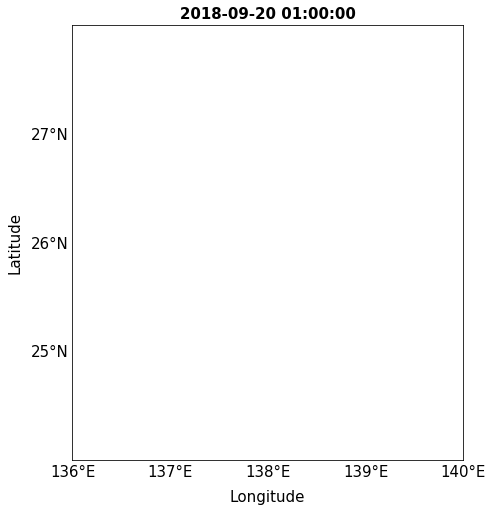

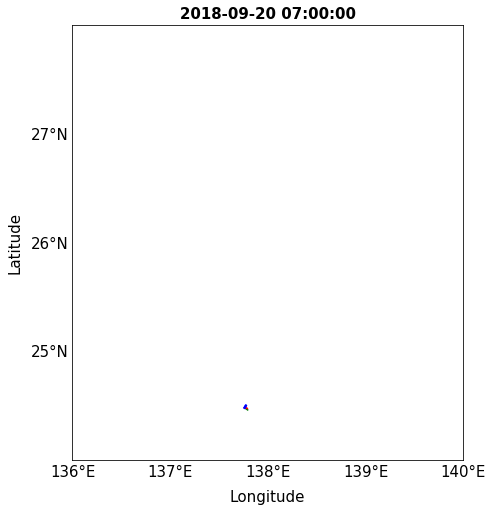

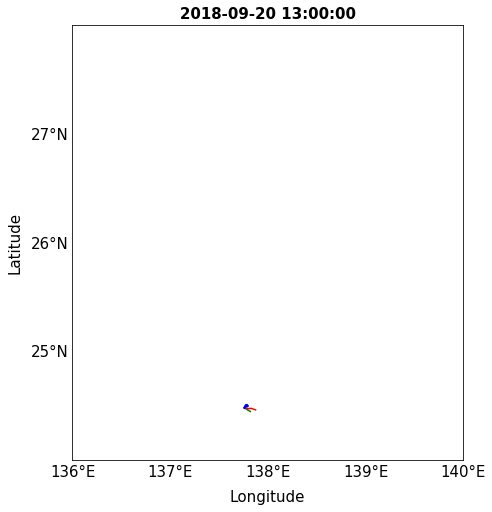

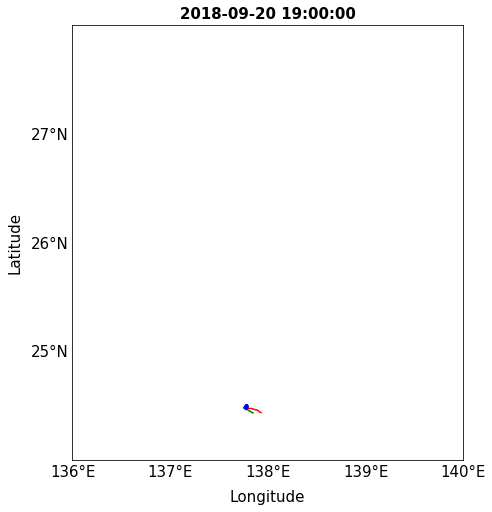

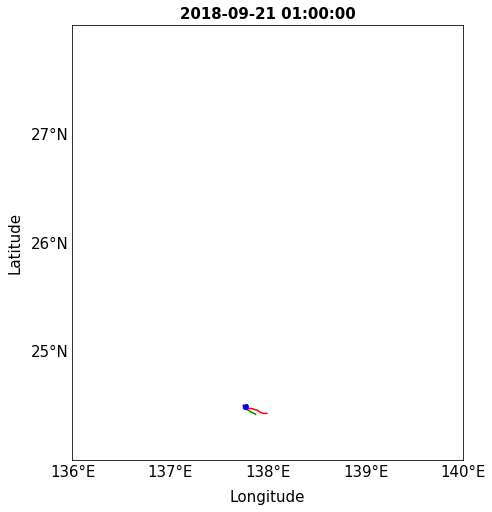

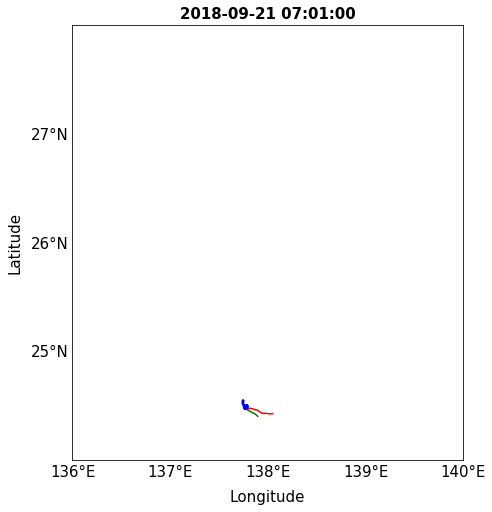

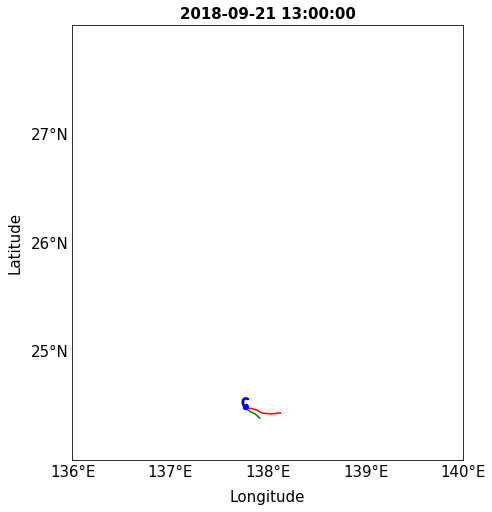

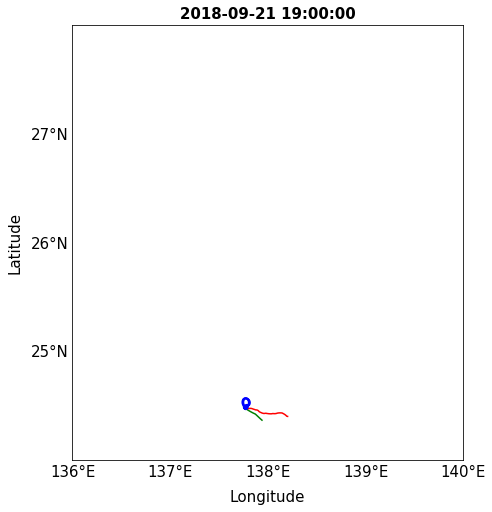

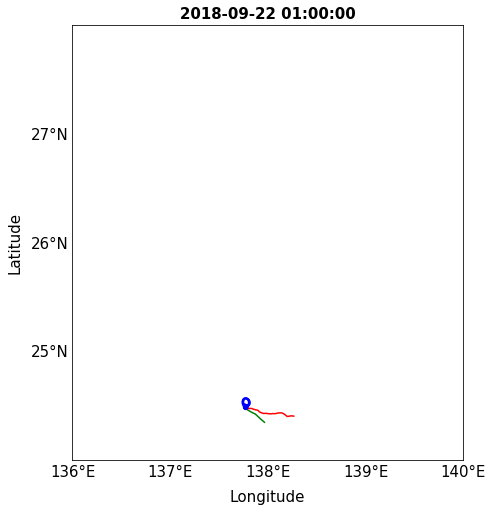

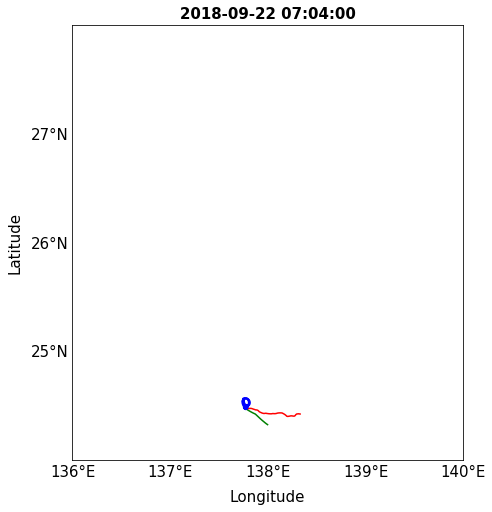

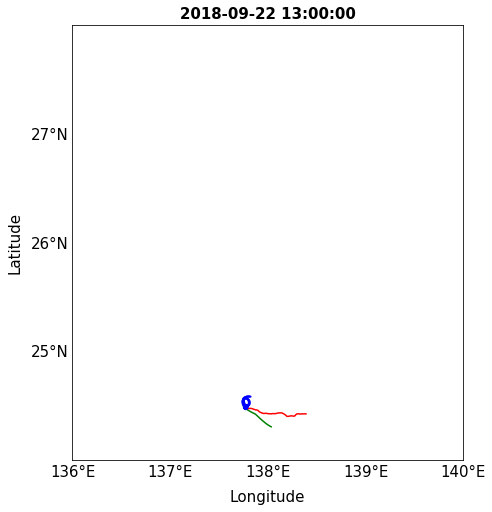

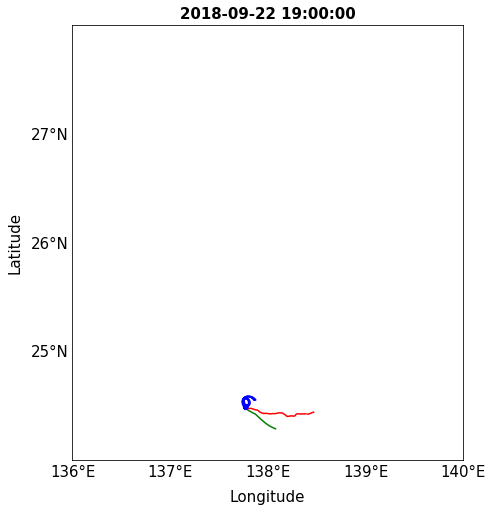

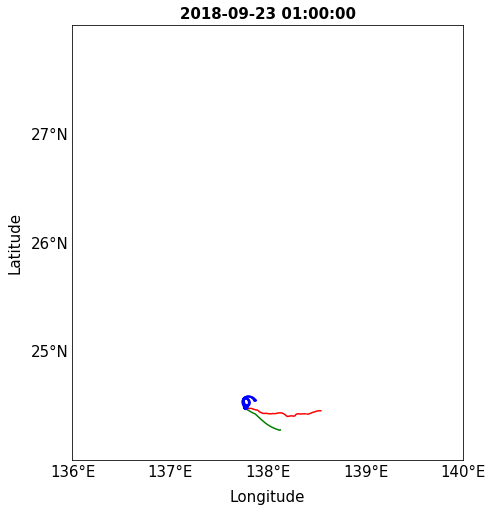

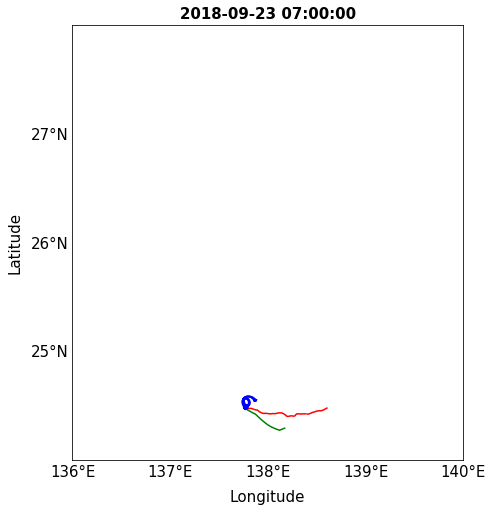

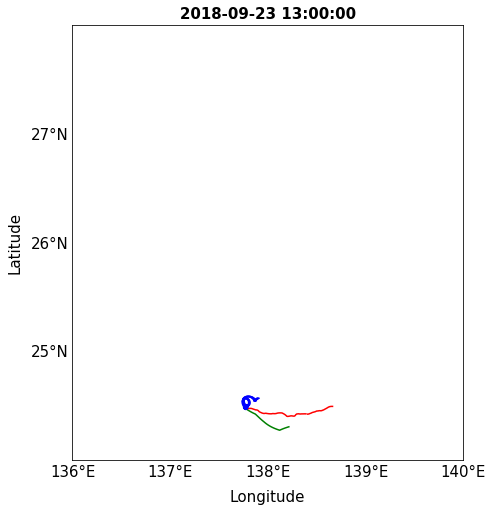

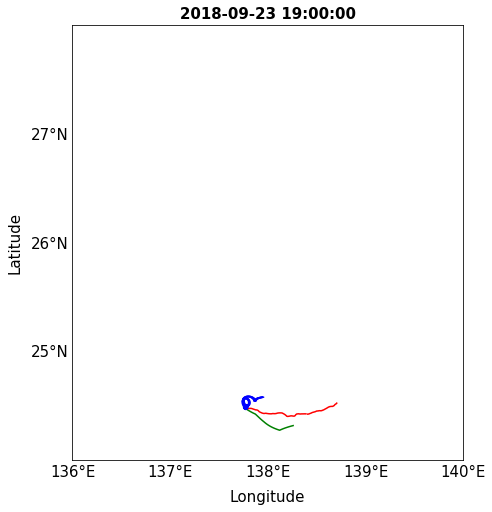

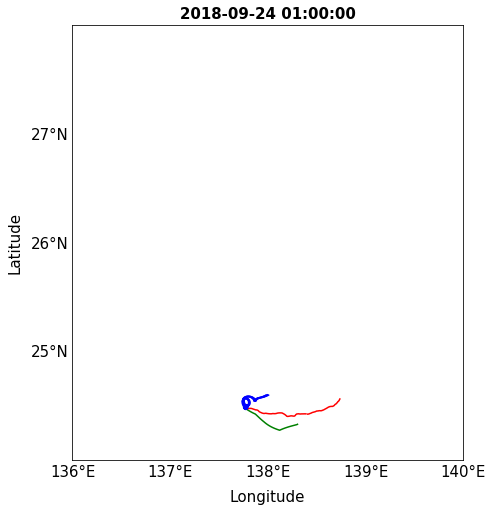

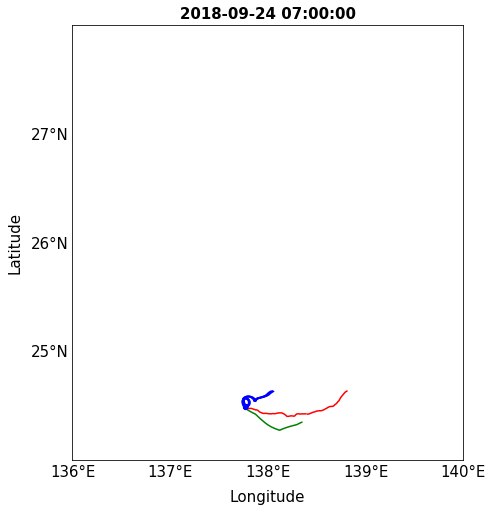

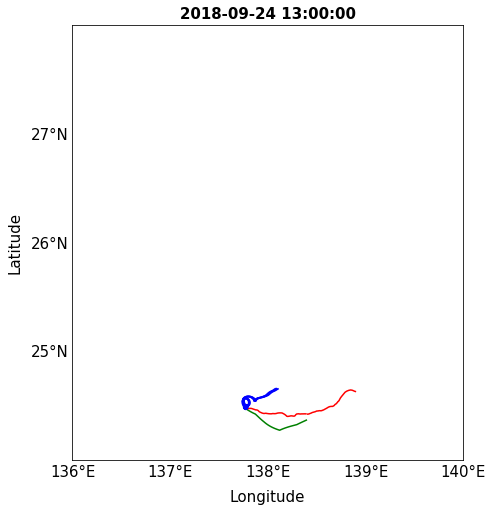

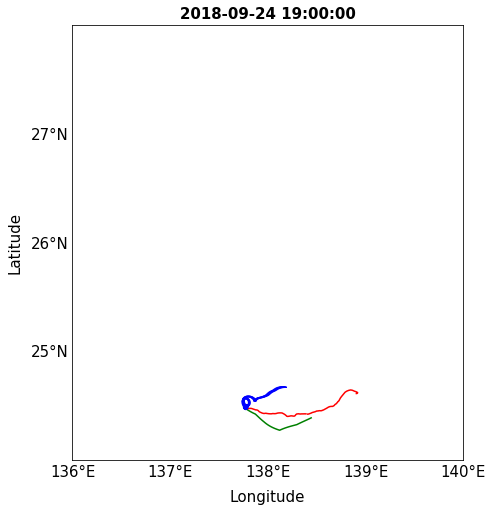

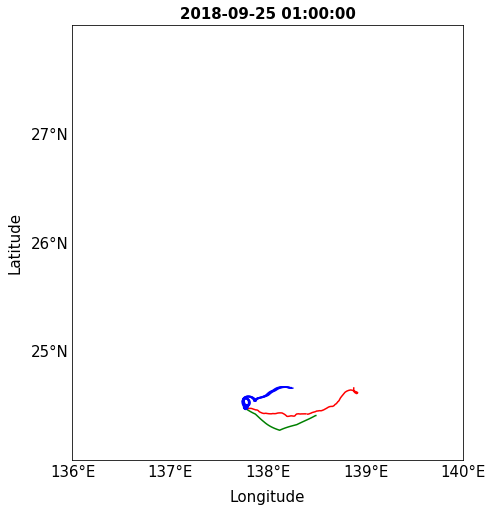

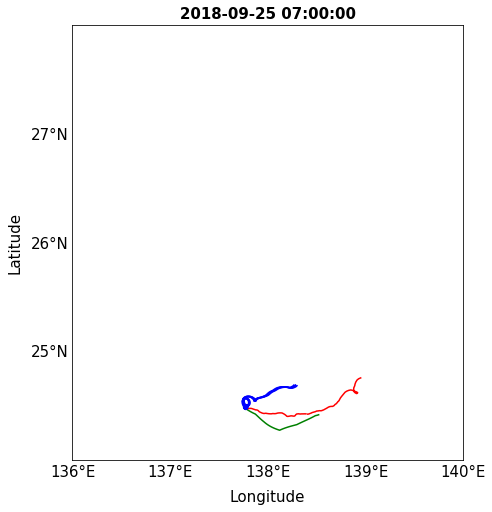

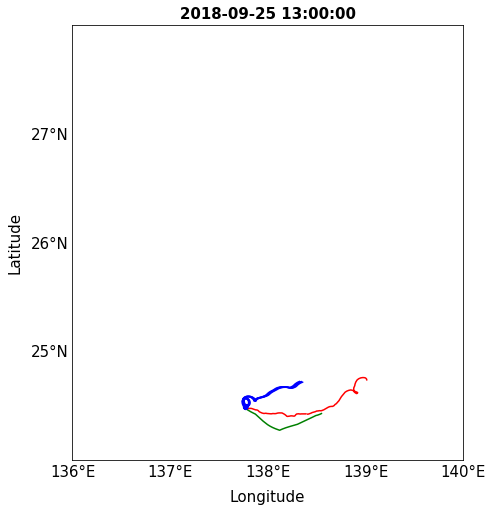

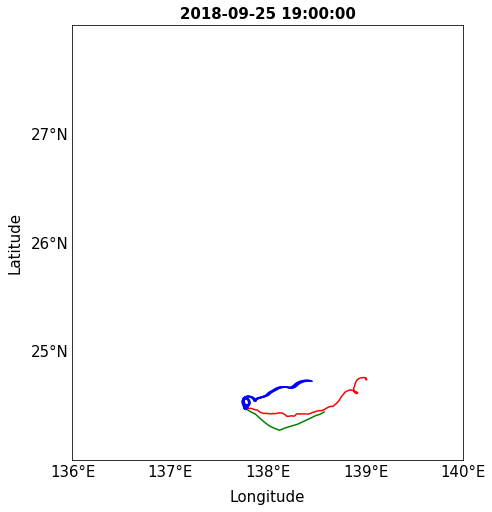

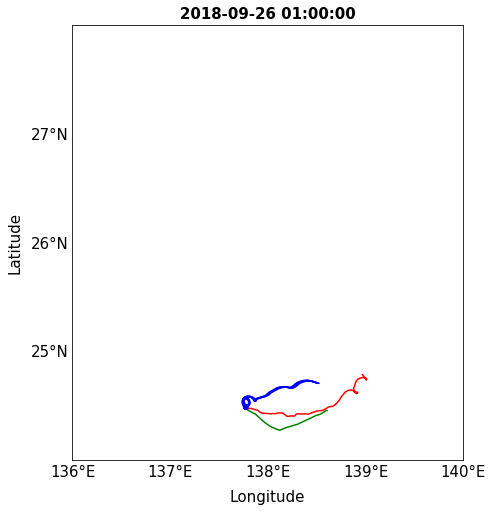

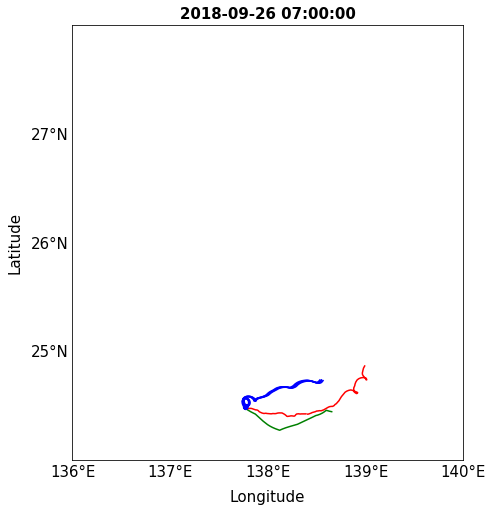

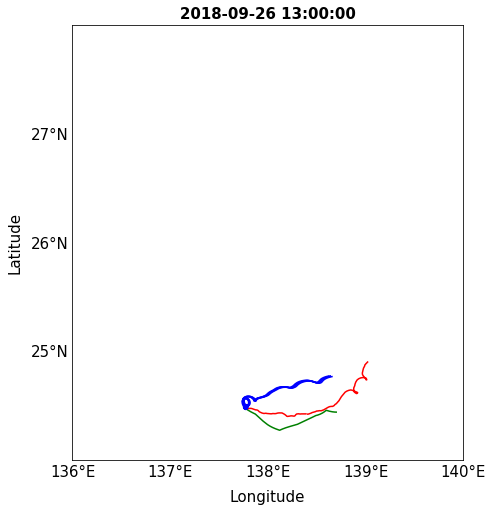

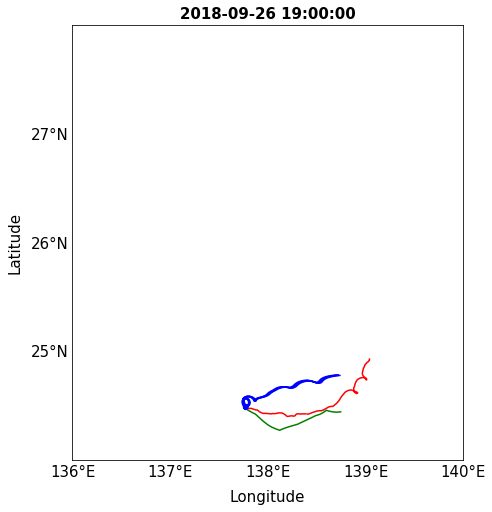

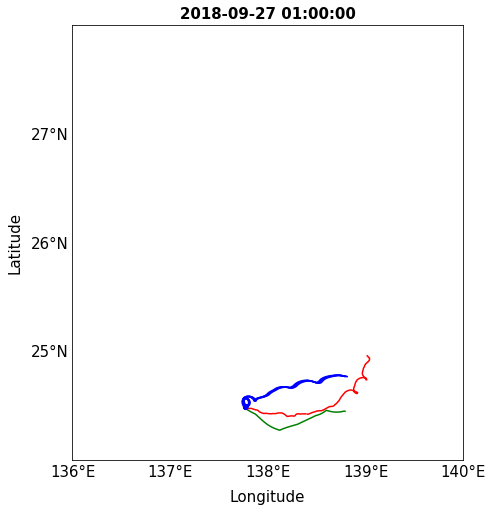

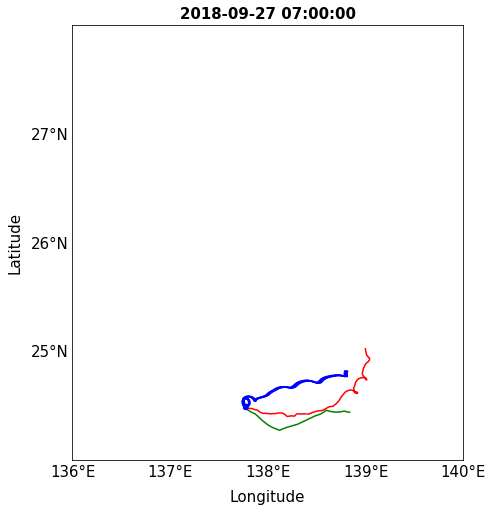

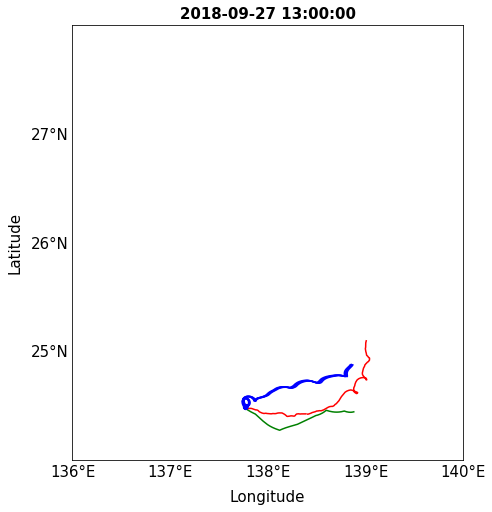

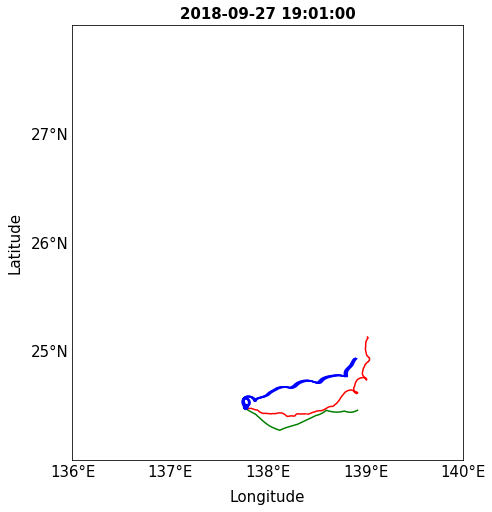

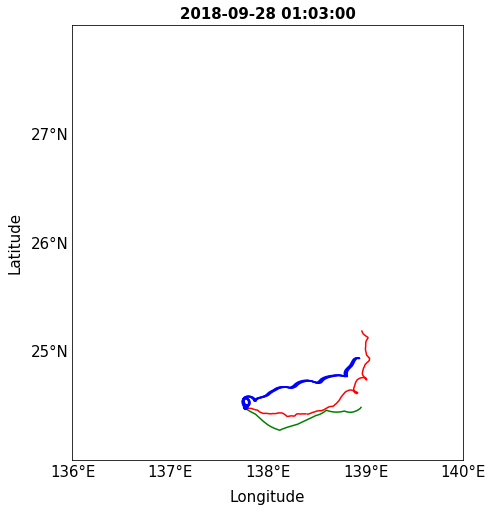

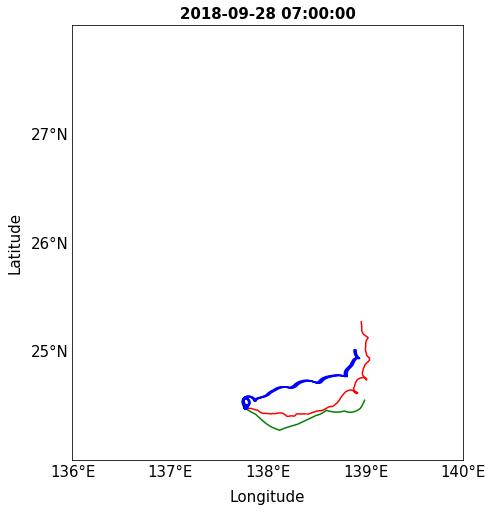

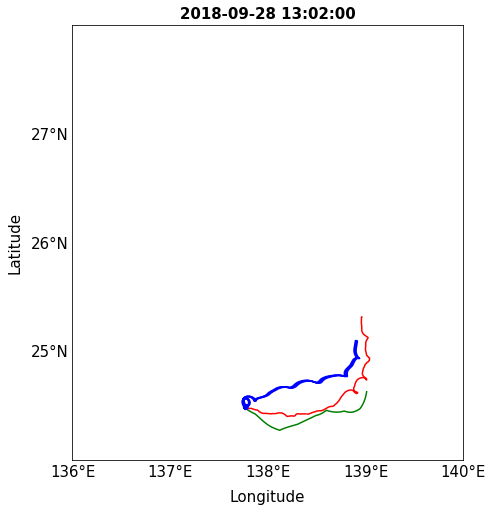

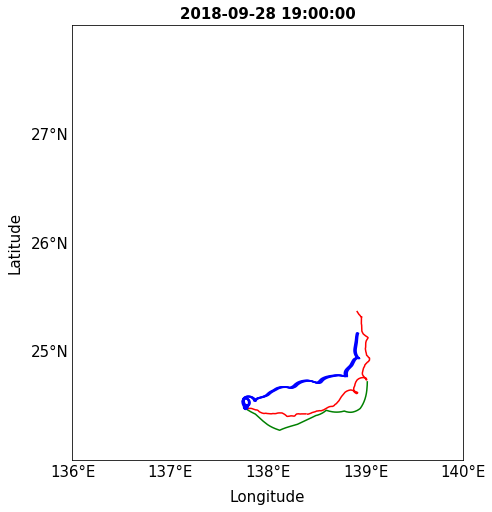

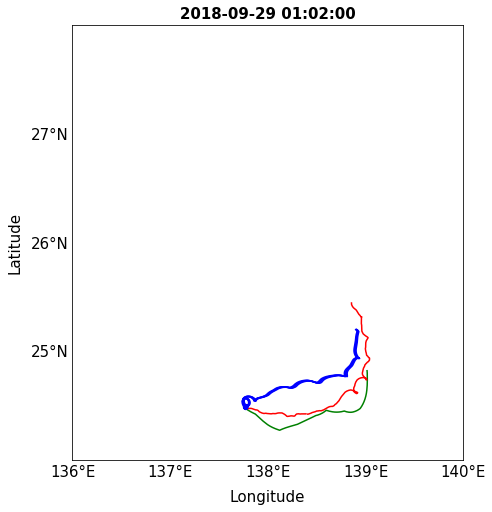

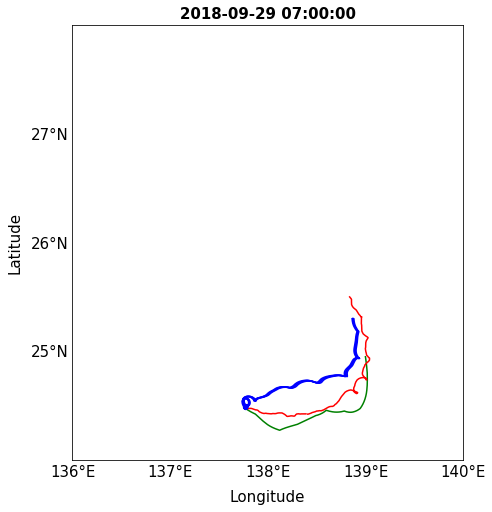

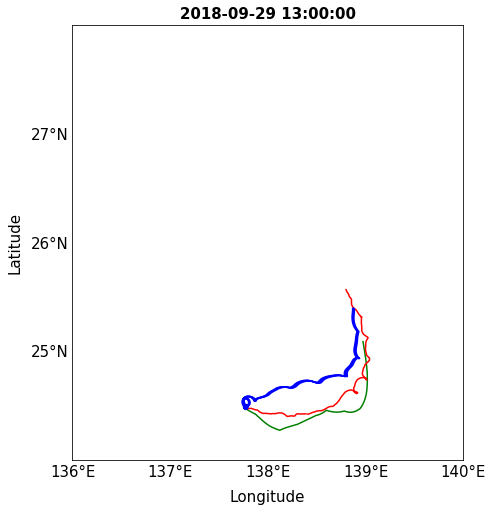

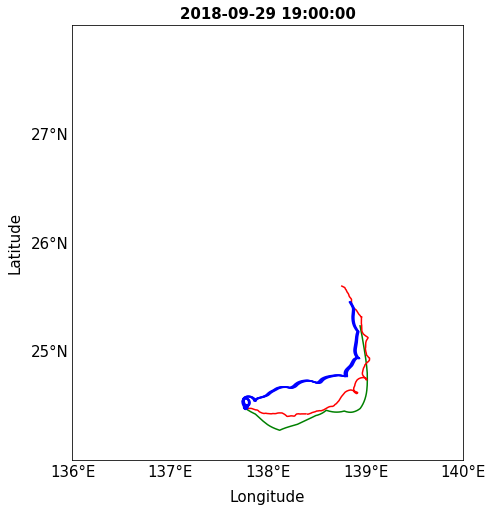

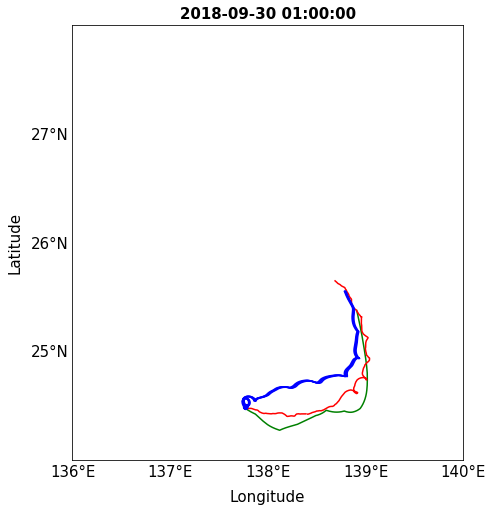

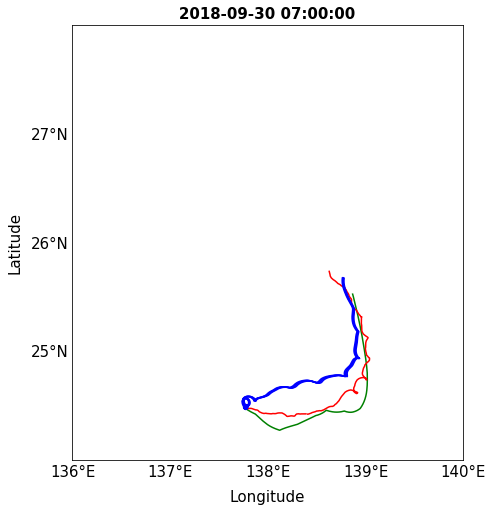

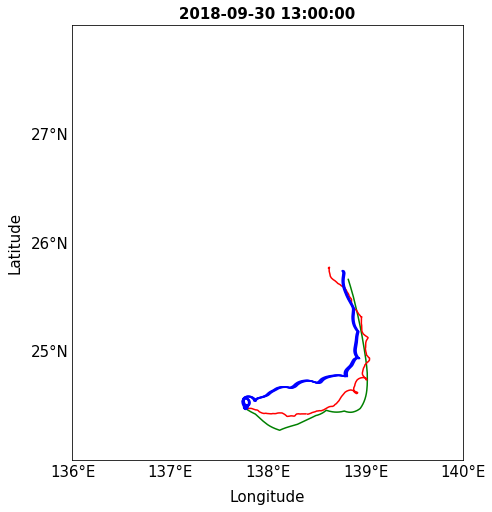

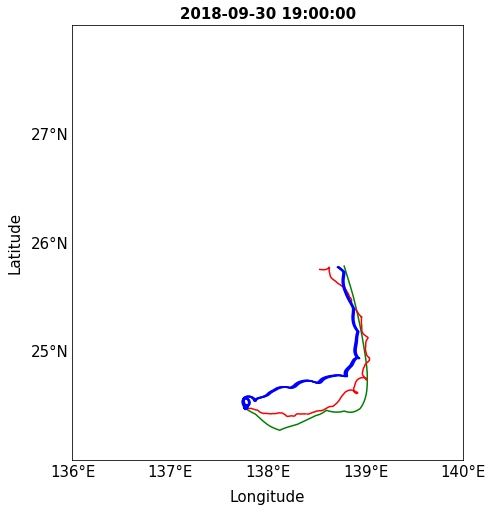

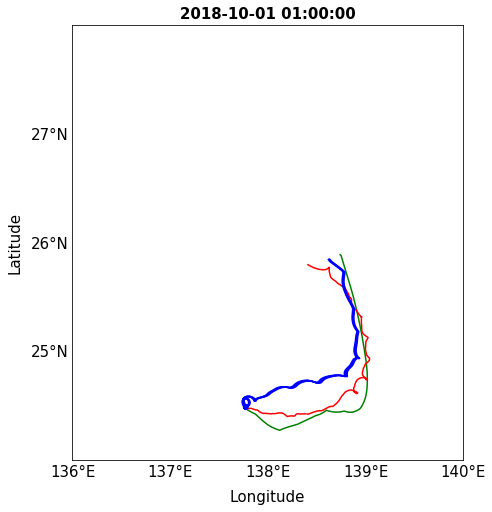

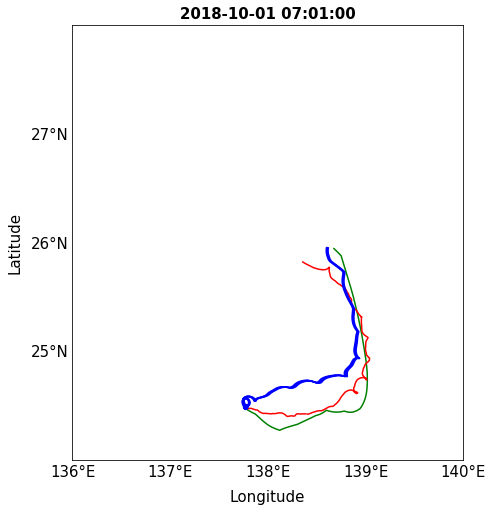

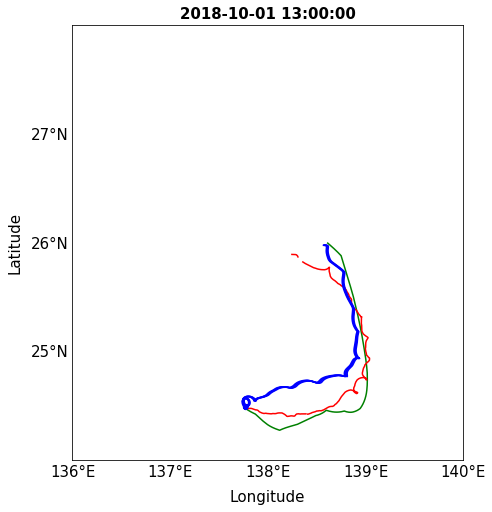

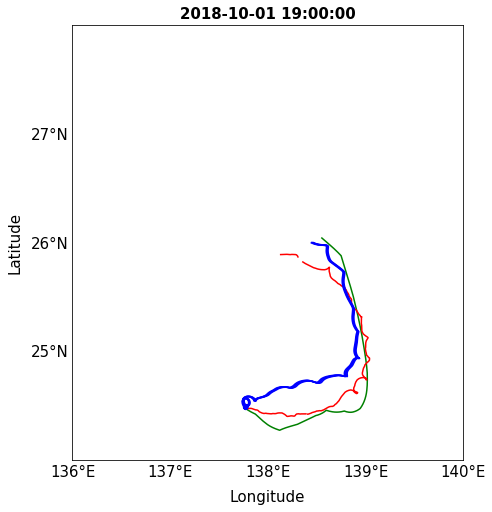

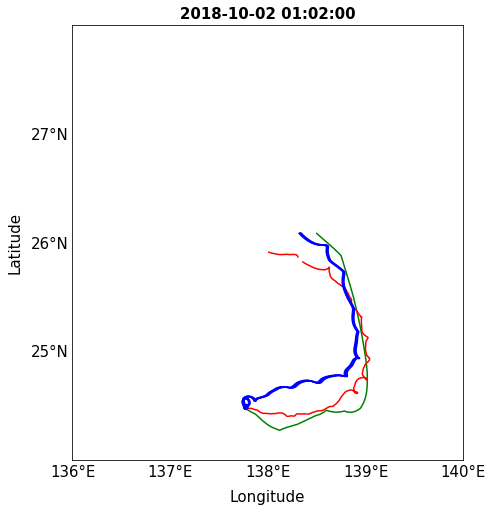

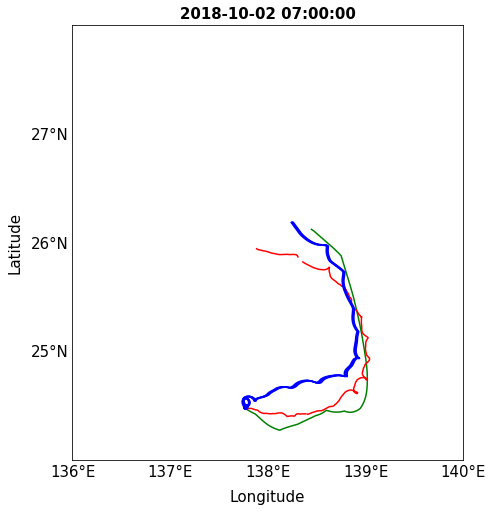

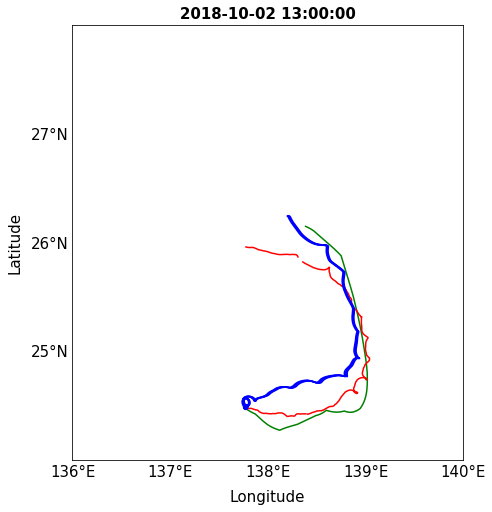

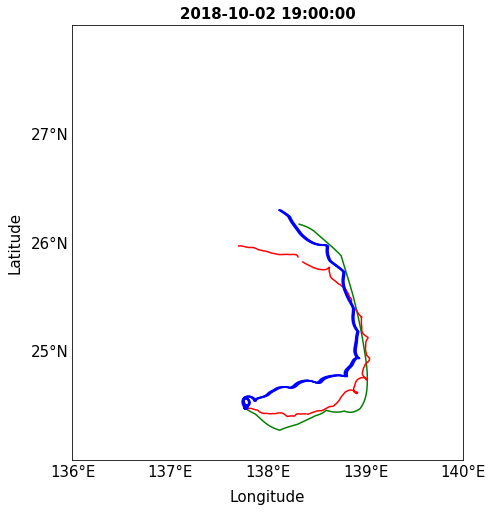

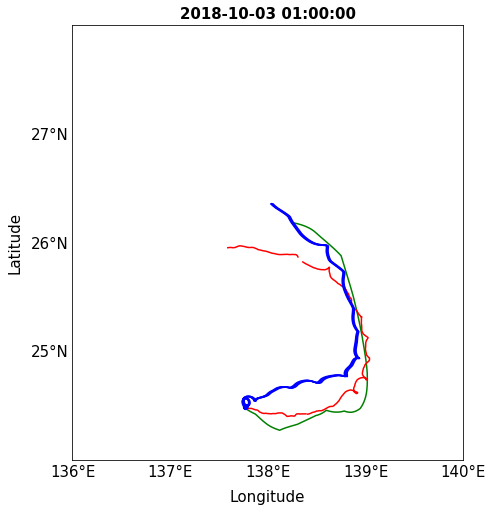

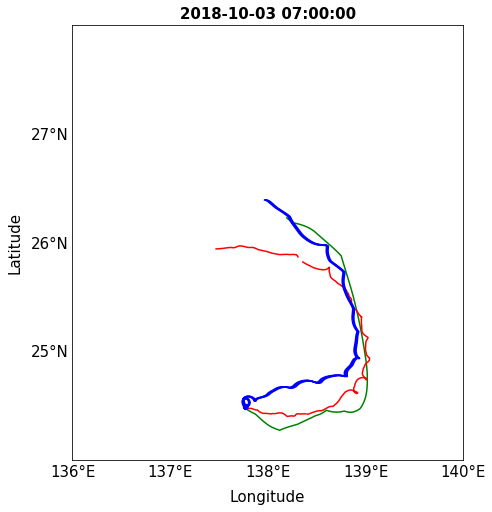

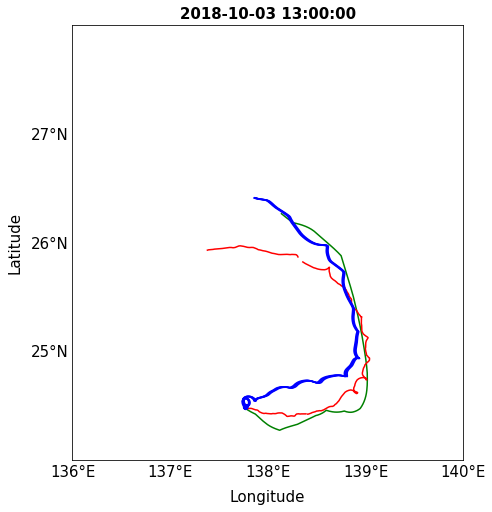

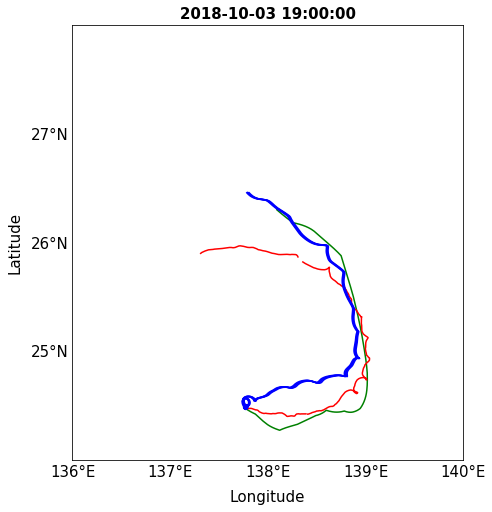

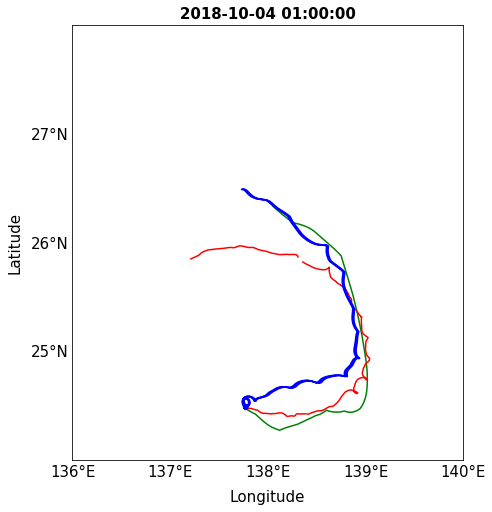

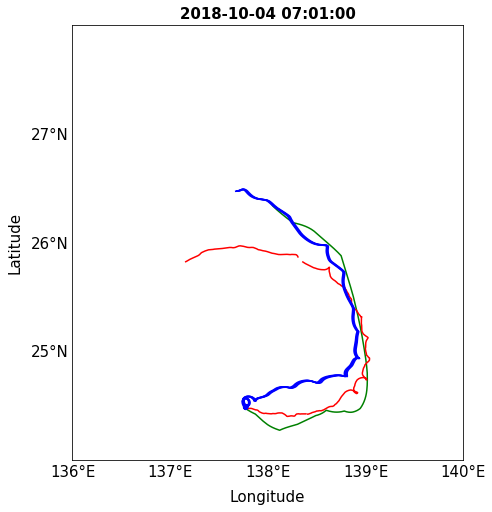

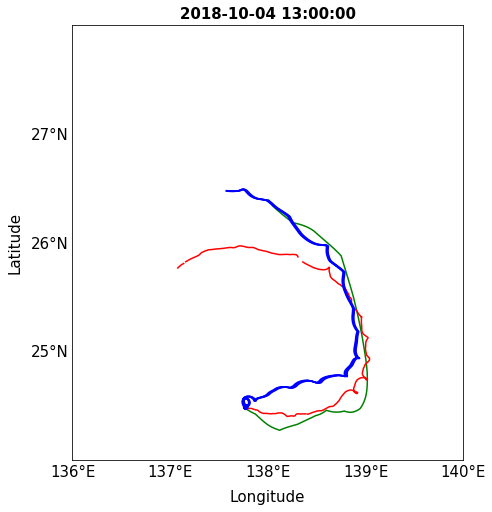

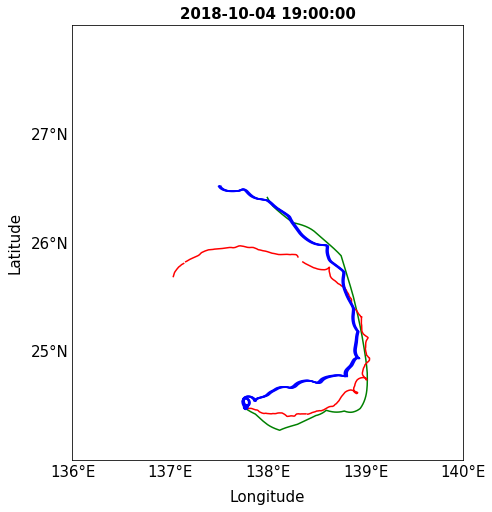

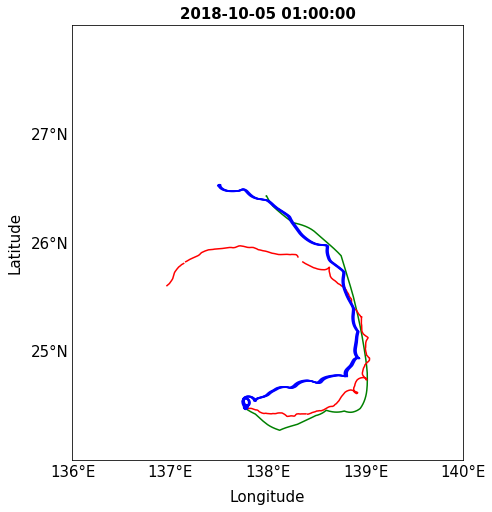

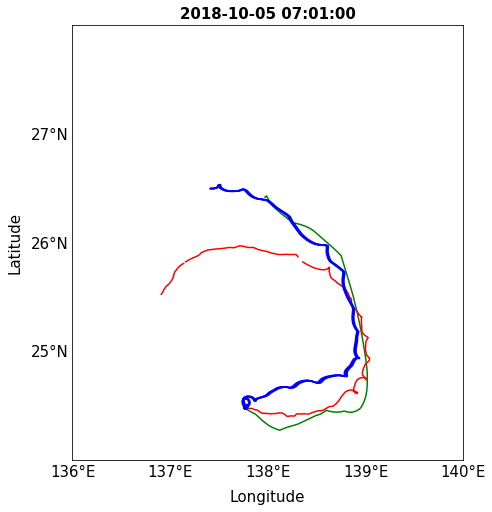

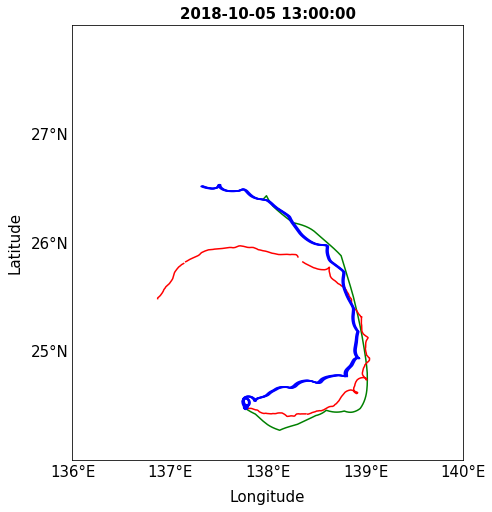

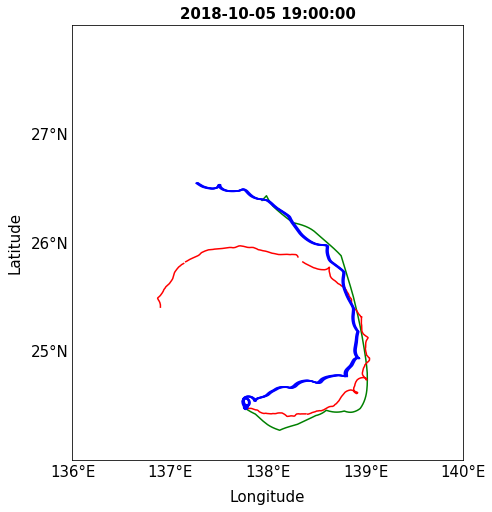

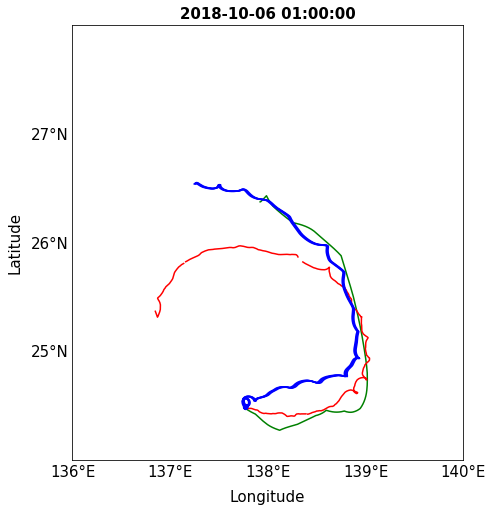

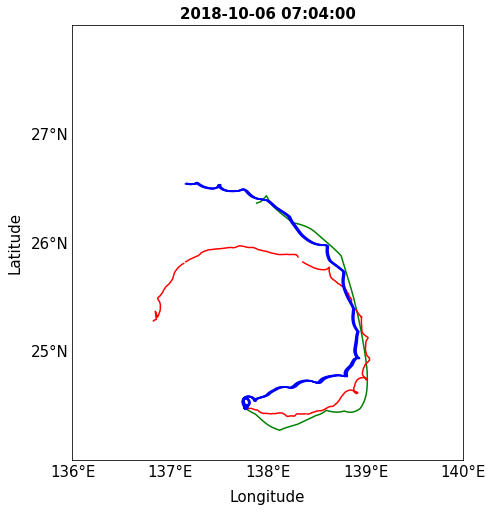

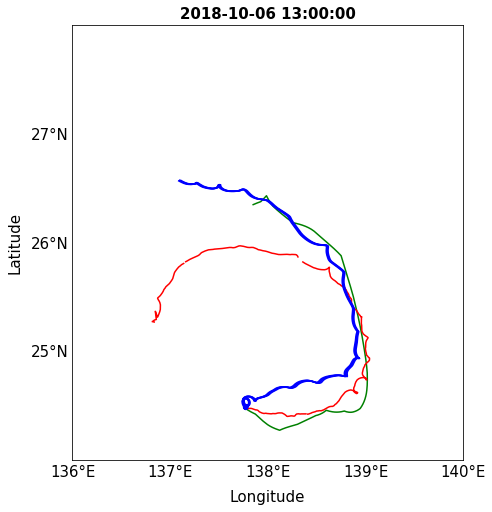

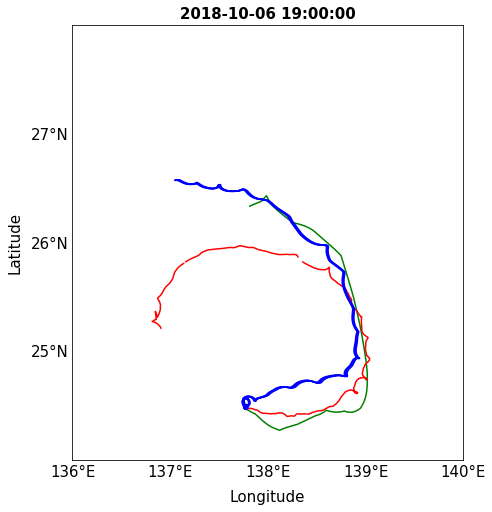

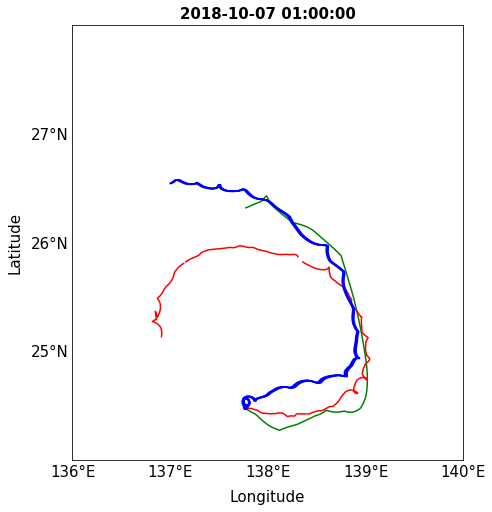

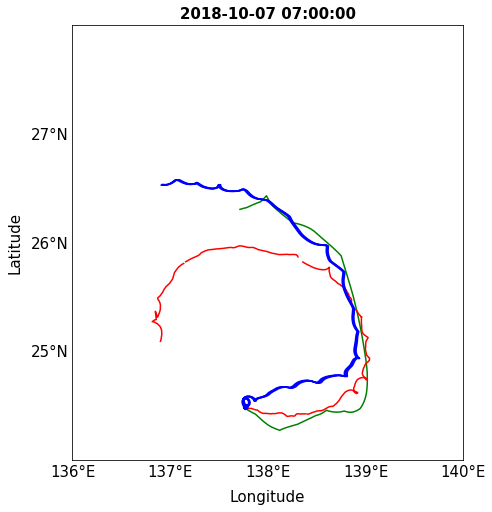

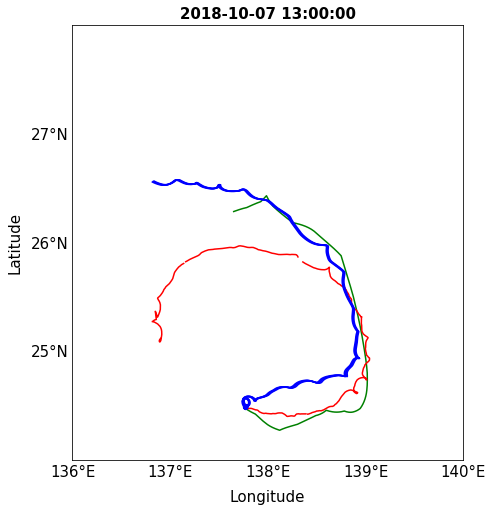

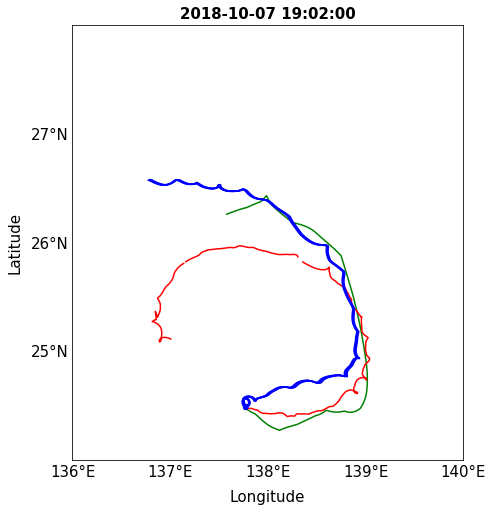

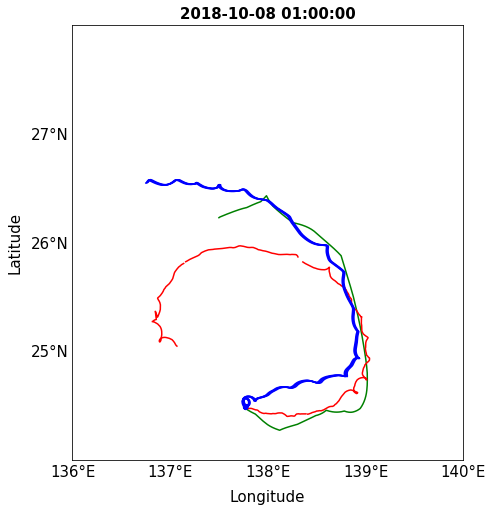

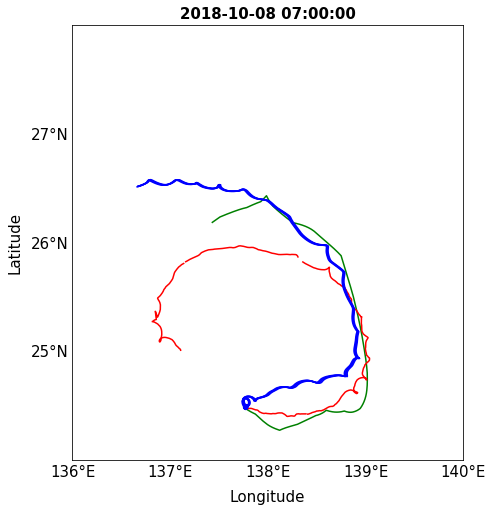

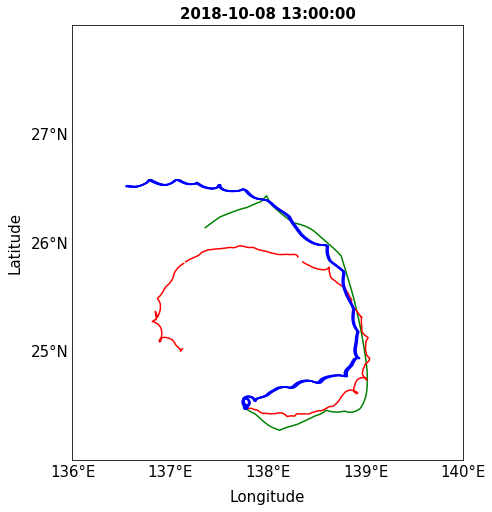

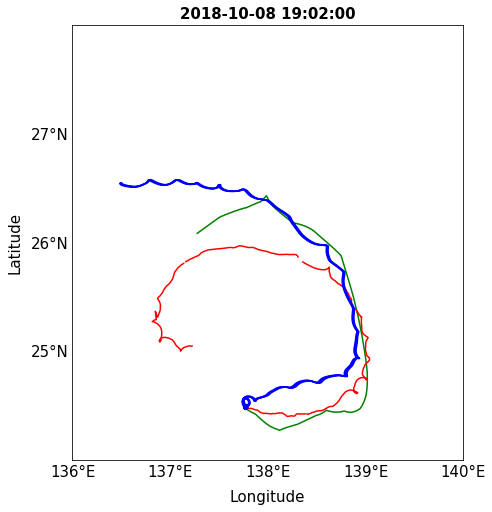

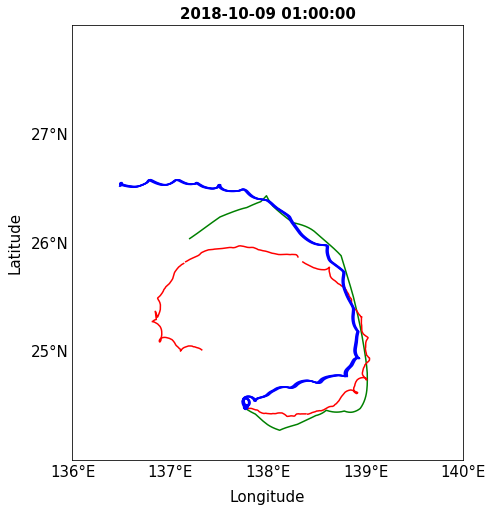

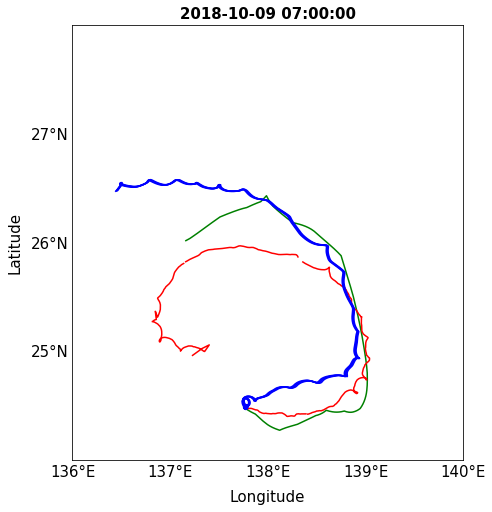

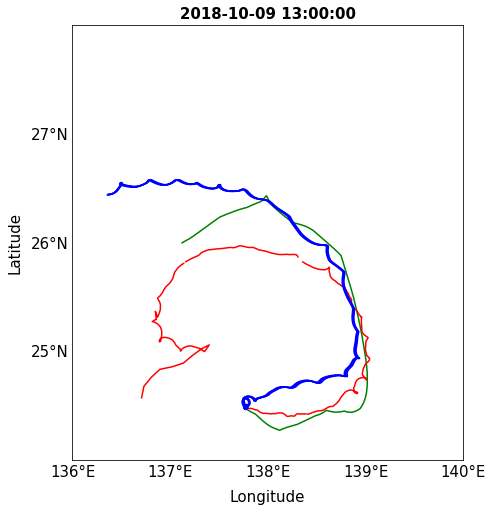

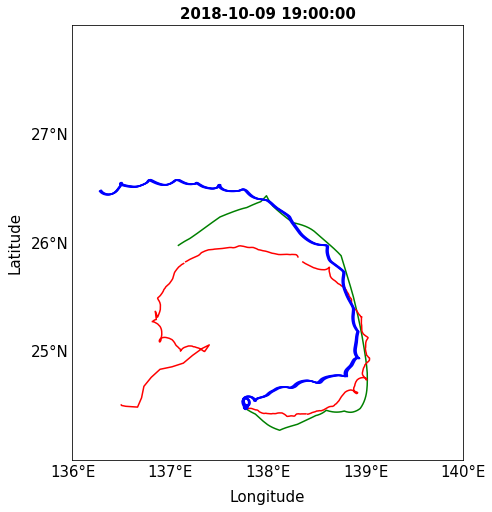

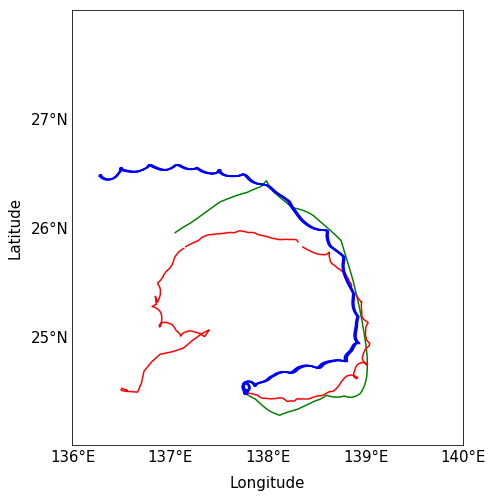

In [9]:
m=Basemap(projection='merc',llcrnrlat=min_lat,urcrnrlat=max_lat,\
            llcrnrlon=min_lon,urcrnrlon=max_lon) #resolution='h'
c=0
for i in range(0,int(row)+1,6):
#for i in range(2):
    fig = plt.figure()
    fig.set_size_inches(10, 8, forward=True)
    ax = plt.gca()

    xh,yh=m(hycom[0][0:i+1].values,hycom[1][0:i+1].values)
    m.plot(xh,yh,'g')

    xg,yg=m(lon[0:i+1],lat[0:i+1])
    m.plot(xg,yg,'r')

    for j in range(points):
        xp,yp=m(lon_data[j][0:i+1].values,lat_data[j][0:i+1].values)
        m.plot(xp,yp,'b')
#make ylabel
    m.drawparallels(np.arange(min_lat,max_lat+1,1),labels=[1,0,0,0],fontsize=15, linewidth=0.0)
#make xlabel
    m.drawmeridians(np.arange(min_lon,max_lon+1,1),labels=[0,0,0,1],fontsize=15, linewidth=0.0)
    plt.xlabel('Longitude',fontsize=15, labelpad=30)
    plt.ylabel('Latitude',fontsize=15 ,  labelpad=50)
    plt.title(str(data['time'][i]),fontsize=15,weight='bold')
    final=os.path.join(result,'gdp_'+str('%3.3i'%c)+'.png')
    fig.savefig(final)
    c=c+1

In [15]:
# change to gif
!convert -delay 50 -loop 0 gdp/80/*.png animated.gif